# Wrangling

## Imports

In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os


## Read In data

In [7]:
path = 'archive'

files = glob.glob(path + "/*.csv")
data_frames = []

for file in files:
    frame = pd.read_csv(file)
    frame['genre'] = frame['genre'].apply(lambda x: str(file))
    data_frames.append(frame)

    
df = pd.concat(data_frames, ignore_index=True)
df.head()


,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt5433140,Fast X,2023,NaN,NaN,archive/crime.csv,NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN
1,tt11564570,Glass Onion,2022,PG-13,139 min,archive/crime.csv,7.2,Famed Southern detective Benoit Blanc travels ...,Rian Johnson,/name/nm0426059/,"Daniel Craig, \nEdward Norton, \nKate Hudson, ...","/name/nm0185819/,/name/nm0001570/,/name/nm0005...",333315.0,NaN
2,tt10365998,Infinity Pool,2023,R,117 min,archive/crime.csv,6.5,James and Em Foster are enjoying an all-inclus...,Brandon Cronenberg,/name/nm0188722/,"Alexander Skarsgård, \nMia Goth, \nCleopatra C...","/name/nm0002907/,/name/nm5301405/,/name/nm1671...",6955.0,NaN
3,tt14138650,The Pale Blue Eye,2022,R,128 min,archive/crime.csv,6.6,A world-weary detective is hired to investigat...,Scott Cooper,/name/nm0178376/,"Christian Bale, \nHarry Melling, \nSimon McBur...","/name/nm0000288/,/name/nm0577982/,/name/nm0564...",85087.0,NaN
4,tt15789492,Infiesto,2023,TV-MA,96 min,archive/crime.csv,5.5,Two detectives are called to a small mining to...,Patxi Amezcua,/name/nm0025538/,"Isak Férriz, \nIria del Río, \nAntonio Buíl, \...","/name/nm1929945/,/name/nm4170579/,/name/nm0125...",2081.0,NaN


## Remove rows with NAN values

In [8]:
df = df.dropna().reset_index(drop=True)
df.head()

# unique_count = clean_df['genre'].nunique()
# unique_count #495 combinations in dataset

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt0068646,The Godfather,1972,R,175 min,archive/crime.csv,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,/name/nm0000338/,"Marlon Brando, \nAl Pacino, \nJames Caan, \nDi...","/name/nm0000008/,/name/nm0000199/,/name/nm0001...",1875646.0,134966411.0
1,tt8946378,Knives Out,2019,PG-13,130 min,archive/crime.csv,7.9,A detective investigates the death of the patr...,Rian Johnson,/name/nm0426059/,"Daniel Craig, \nChris Evans, \nAna de Armas, \...","/name/nm0185819/,/name/nm0262635/,/name/nm1869...",705622.0,165359751.0
2,tt0993846,The Wolf of Wall Street,2013,R,180 min,archive/crime.csv,8.2,"Based on the true story of Jordan Belfort, fro...",Martin Scorsese,/name/nm0000217/,"Leonardo DiCaprio, \nJonah Hill, \nMargot Robb...","/name/nm0000138/,/name/nm1706767/,/name/nm3053...",1430476.0,116900694.0
3,tt0110912,Pulp Fiction,1994,R,154 min,archive/crime.csv,8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,/name/nm0000233/,"John Travolta, \nUma Thurman, \nSamuel L. Jack...","/name/nm0000237/,/name/nm0000235/,/name/nm0000...",2074027.0,107928762.0
4,tt0468569,The Dark Knight,2008,PG-13,152 min,archive/crime.csv,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,/name/nm0634240/,"Christian Bale, \nHeath Ledger, \nAaron Eckhar...","/name/nm0000288/,/name/nm0005132/,/name/nm0001...",2675531.0,534858444.0


## Narrow down columns

In [9]:
df = df.loc[:, ['movie_name', 'year', 'certificate', 'runtime', 'genre', 'rating', 'votes', 'gross(in $)']]

df.head()


,movie_name,year,certificate,runtime,genre,rating,votes,gross(in $)
0,The Godfather,1972,R,175 min,archive/crime.csv,9.2,1875646.0,134966411.0
1,Knives Out,2019,PG-13,130 min,archive/crime.csv,7.9,705622.0,165359751.0
2,The Wolf of Wall Street,2013,R,180 min,archive/crime.csv,8.2,1430476.0,116900694.0
3,Pulp Fiction,1994,R,154 min,archive/crime.csv,8.9,2074027.0,107928762.0
4,The Dark Knight,2008,PG-13,152 min,archive/crime.csv,9.0,2675531.0,534858444.0


## Format Columns

In [10]:
#Format runtimes into floats
def convert_runtime(string):
    return float(string.split(' ')[0])
    
df['runtime'] = df['runtime'].apply(convert_runtime)
df = df[df['runtime'] < 300]


#Format genre by using only first value
def genre_parse(genre):
    print(genre)
    genre = genre.split('/')[-1] # remove directory path
    genre = genre[:-4]
    
    genre = genre.lower()
    print(genre)
    return genre
  
df['genre']=df['genre'].apply(genre_parse)
df = df.drop(df.loc[(df['genre'] == 'musical') | (df['genre'] == 'romance') | (df['genre'] == 'biography') | (df['genre']=='animation')].index)

# Format Certificate filter out all data points to only include movies with the G, PG, PG-13, R, and NC-17 ratings, switch Not Rated to NR
def convert_unrated(certificate):
    if certificate == 'Not Rated':
        return 'NR'
    else:
        return certificate
    
df=df.loc[(df['certificate'] == 'R') | (df['certificate'] =='PG-13') | (df['certificate'] == 'PG') | (df['certificate'] == 'Not Rated') | (df['certificate'] =='X') | (df['certificate'] == 'NC-17')]
df['certificate']=df['certificate'].apply(convert_unrated)

#Format years into ints and include only the past 25 years worth of data. 
df['year'] = df['year'].astype(int)
df = df.loc[(df['year'] >= 1997)].reset_index(drop=True)

df.head()

archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.csv
crime
archive/crime.cs

,movie_name,year,certificate,runtime,genre,rating,votes,gross(in $)
0,Knives Out,2019,PG-13,130.0,crime,7.9,705622.0,165359751.0
1,The Wolf of Wall Street,2013,R,180.0,crime,8.2,1430476.0,116900694.0
2,The Dark Knight,2008,PG-13,152.0,crime,9.0,2675531.0,534858444.0
3,American Psycho,2000,R,102.0,crime,7.6,636221.0,15070285.0
4,John Wick,2014,R,101.0,crime,7.4,644257.0,43037835.0


# Data Engineering

## Remove Repeats and One Hot Encode

In [11]:
df_pre_eng = df
genres = df['genre'].unique()
for genre in genres:
    df[genre] = 0
names = df['movie_name'].unique()

for name in names:
    repeats = df.loc[(df['movie_name'] == name)]
    genres = []
    
    for index in list(repeats.index):
        genres.append(repeats.loc[index,'genre'])
    
    for genre in genres:
        df.loc[list(repeats.index)[0], genre] = 1
    
    df = df.drop(list(repeats.index)[1:])
    
df=df.drop(['movie_name', 'genre'], axis=1)
df.head()

,year,certificate,runtime,rating,votes,gross(in $),crime,fantasy,history,scifi,thriller,action,family,mystery,war,adventure,sports,horror
0,2019,PG-13,130.0,7.9,705622.0,165359751.0,1,0,0,0,1,0,0,1,0,0,0,0
1,2013,R,180.0,8.2,1430476.0,116900694.0,1,0,0,0,0,0,0,0,0,0,0,0
2,2008,PG-13,152.0,9.0,2675531.0,534858444.0,1,0,0,0,1,1,0,0,0,0,0,0
3,2000,R,102.0,7.6,636221.0,15070285.0,1,0,0,0,0,0,0,0,0,0,0,1
4,2014,R,101.0,7.4,644257.0,43037835.0,1,0,0,0,1,1,0,0,0,0,0,0


In [12]:
# scale down gross earnings from dollars to millions of dollars
df['gross(in $)'] = df['gross(in $)']/1e6

# EDA

<Figure size 2880x2880 with 0 Axes>

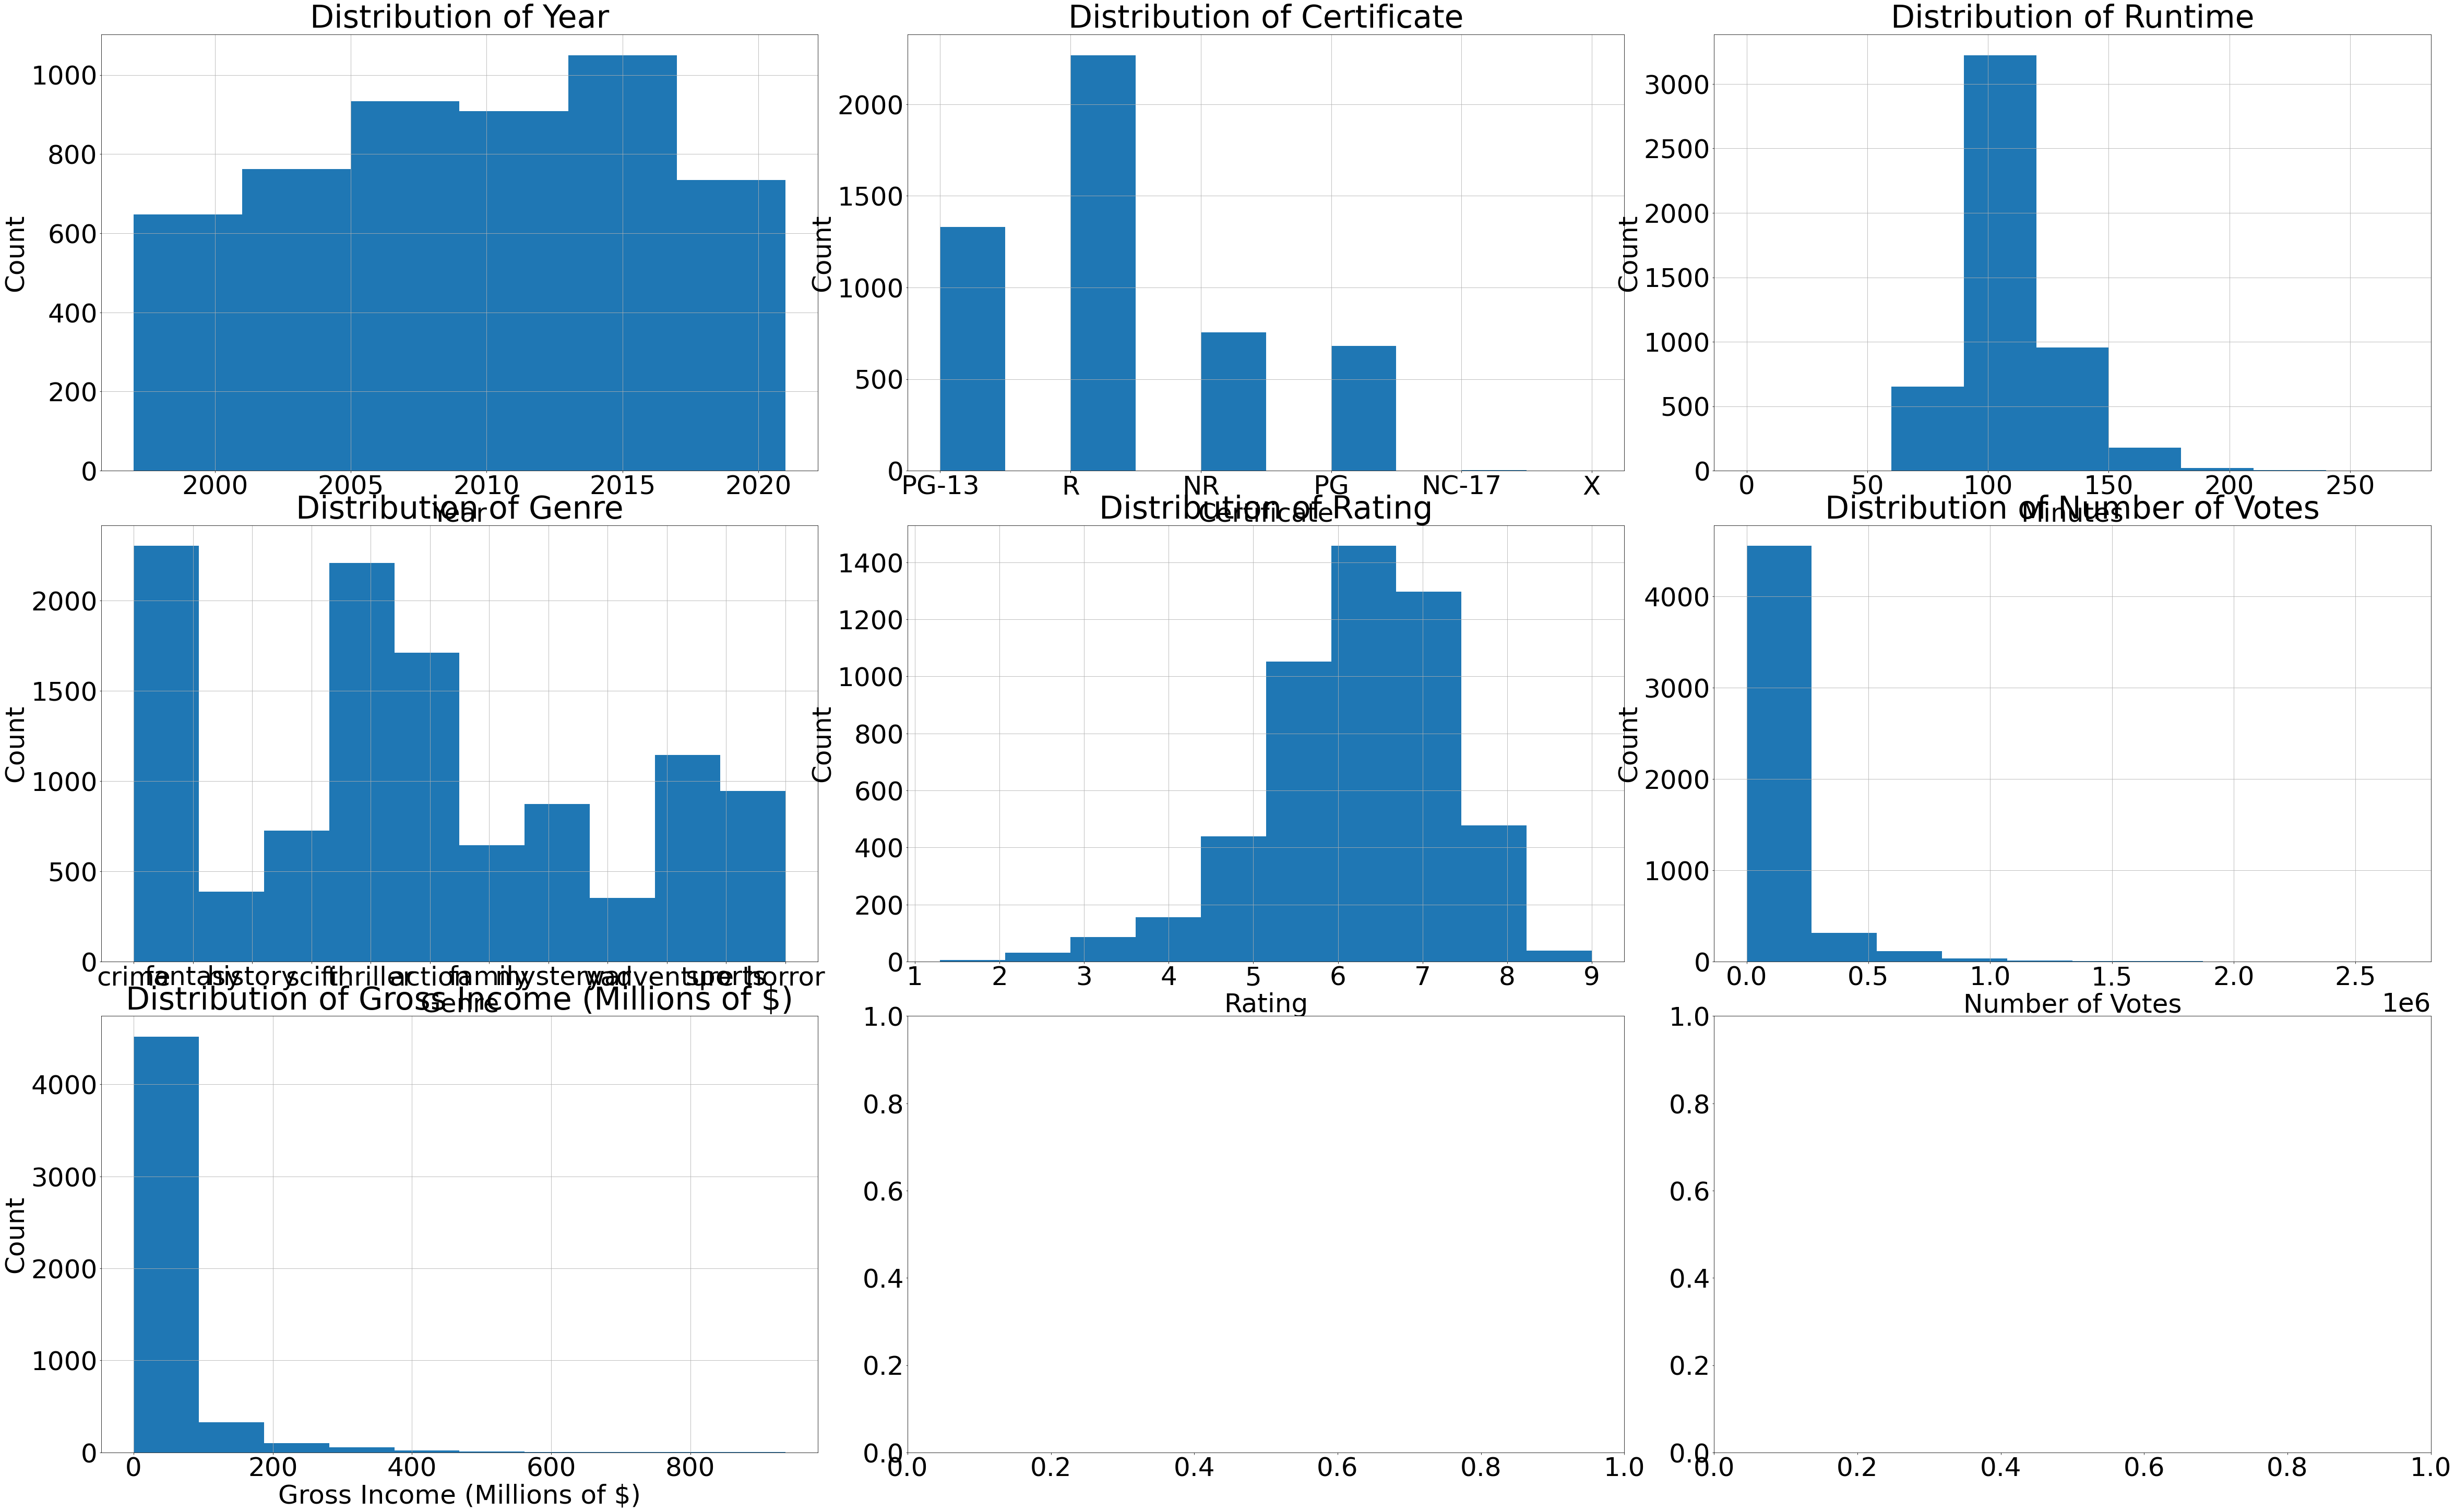

Earliest Year: 1997
Latest Year: 2022
['crime' 'fantasy' 'history' 'scifi' 'thriller' 'action' 'family'
 'mystery' 'war' 'adventure' 'sports' 'horror']
Shortest Movie Runtime: 45.0 min
Longest Movie Runtime: 219.0 min
Average Movie Runtime: 108.18975784041287 min


In [13]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(40,40))
plt.rc('font', size=50)          # controls default text sizes    # fontsize of the x and y labels
plt.rc('xtick', labelsize=50)    # fontsize of the tick labels
plt.rc('ytick', labelsize=50) 
fig, (ax1, ax2, ax3) = plt.subplots(3, 3, gridspec_kw={'wspace':1/8, 'hspace':1/8})

df['year'].hist(bins=range(1997, 2022, 4), ax=ax1[0])
ax1[0].set_xlabel('Year')
ax1[0].set_ylabel('Count')
ax1[0].set_title('Distribution of Year')

df['certificate'].hist(ax=ax1[1])
ax1[1].set_title('Distribution of Certificate')
ax1[1].set_xlabel('Certificate')
ax1[1].set_ylabel('Count')

df['runtime'].hist(bins=range(0, 300, 30), ax=ax1[2])
ax1[2].set_xlabel('Minutes')
ax1[2].set_ylabel('Count')
ax1[2].set_title('Distribution of Runtime')

df_pre_eng['genre'].hist(ax=ax2[0],figsize=(80,50))
ax2[0].set_title('Distribution of Genre')
ax2[0].set_xlabel('Genre')
ax2[0].set_ylabel('Count')

df['rating'].hist(ax=ax2[1])
ax2[1].set_title('Distribution of Rating')
ax2[1].set_xlabel('Rating')
ax2[1].set_ylabel('Count')

df['votes'].hist(ax=ax2[2])
ax2[2].set_title('Distribution of Number of Votes')
ax2[2].set_xlabel('Number of Votes')
ax2[2].set_ylabel('Count')

df['gross(in $)'].hist(ax=ax3[0])
ax3[0].set_title('Distribution of Gross Income (Millions of $)')
ax3[0].set_xlabel('Gross Income (Millions of $)')
ax3[0].set_ylabel('Count')

plt.show()

print('Earliest Year:', df['year'].min())
print('Latest Year:', df['year'].max())

print(df_pre_eng['genre'].unique())

print('Shortest Movie Runtime:', df['runtime'].min(), 'min')
print('Longest Movie Runtime:', df['runtime'].max(), 'min')
print('Average Movie Runtime:', df['runtime'].mean(), 'min')


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

Text(0, 0.5, 'Gross Income (Millions of $)')

<Figure size 4320x2880 with 0 Axes>

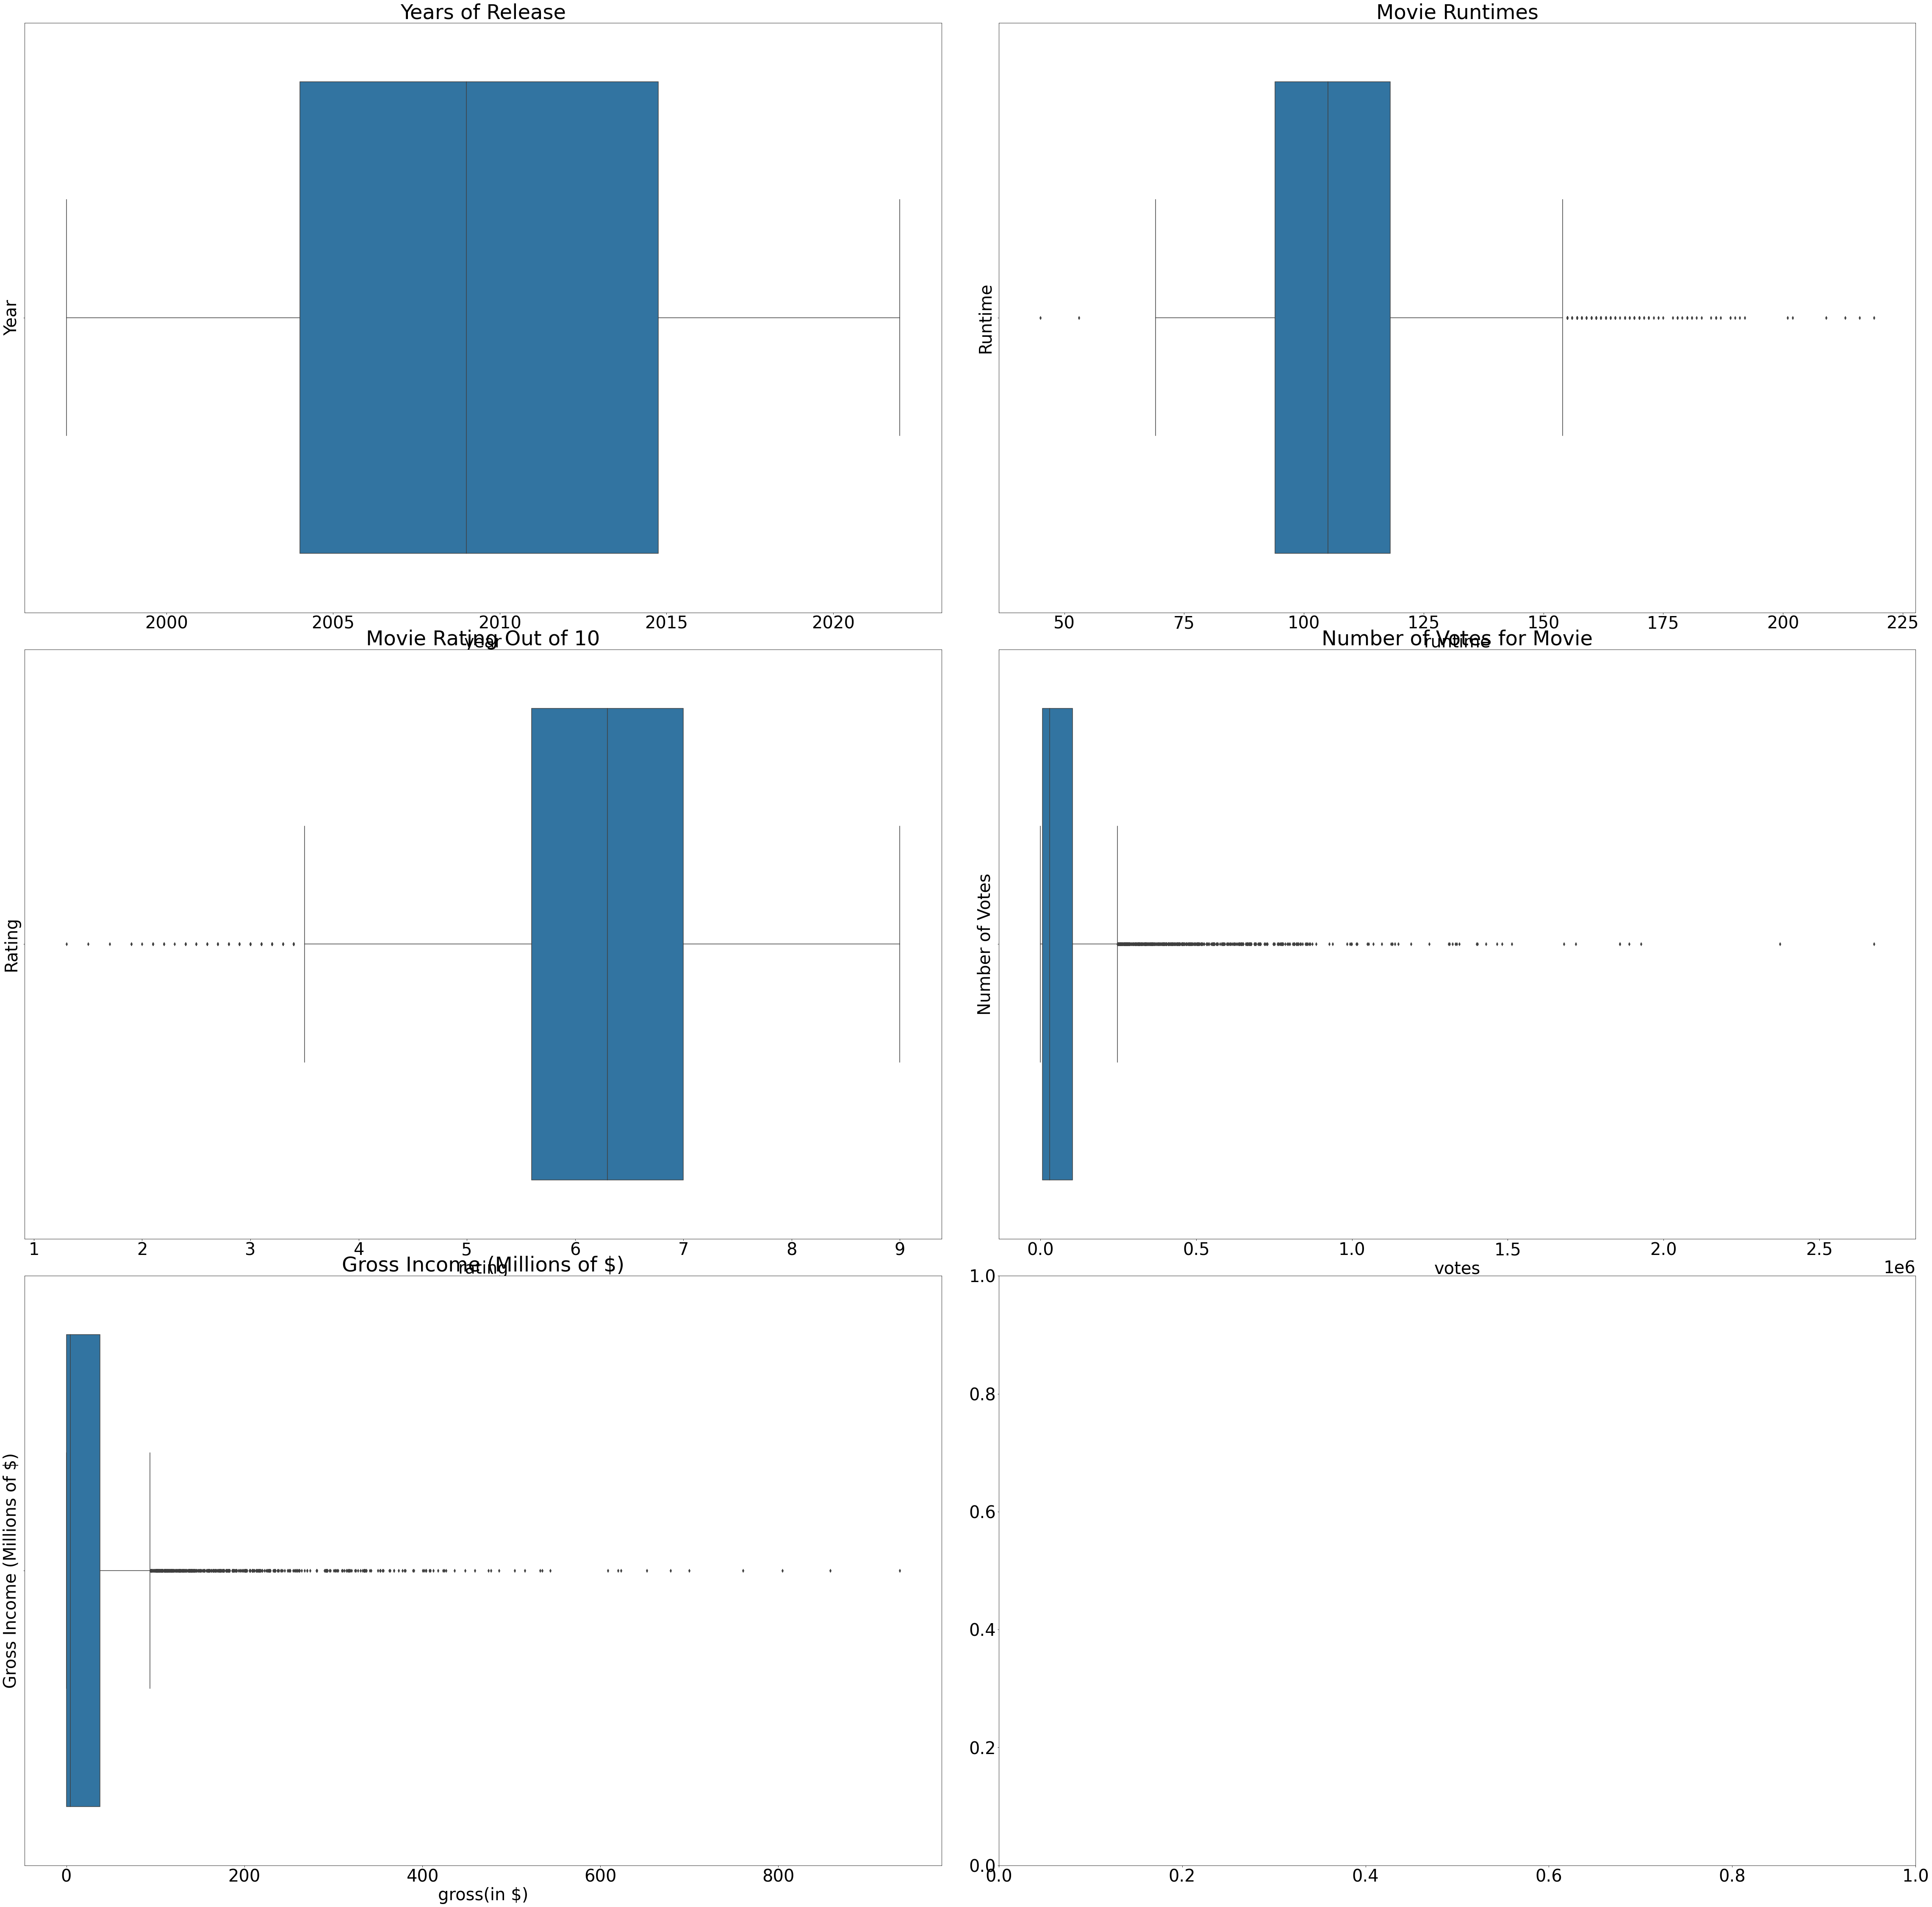

In [14]:
import seaborn as sns
plt.figure(figsize=(60,40))
plt.rc('font', size=40)          # controls default text sizes    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40) 
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, gridspec_kw={'wspace':1/16, 'hspace':1/16}, figsize=(80, 80))

sns.boxplot(df['year'],ax=ax1[0])
ax1[0].set_title('Years of Release')
ax1[0].set_ylabel('Year')

sns.boxplot(df['runtime'],ax=ax1[1])
ax1[1].set_title('Movie Runtimes')
ax1[1].set_ylabel('Runtime')

sns.boxplot(df['rating'],ax=ax2[0])
ax2[0].set_title('Movie Rating Out of 10')
ax2[0].set_ylabel('Rating')

sns.boxplot(df['votes'],ax=ax2[1])
ax2[1].set_title('Number of Votes for Movie')
ax2[1].set_ylabel('Number of Votes')

sns.boxplot(df['gross(in $)'],ax=ax3[0])
ax3[0].set_title('Gross Income (Millions of $)')
ax3[0].set_ylabel('Gross Income (Millions of $)')

In [15]:
def outliers(ls):
    q3= ls.quantile(0.75)
    q1= ls.quantile(0.25)
    IQR=q3-q1
    outliers_upper = ls.loc[ls > q3 + 1.5 * IQR]
    outliers_lower = df['runtime'].loc[df['runtime'] < q1 - 1.5 * IQR]
    num_outliers_runtime = len(outliers_lower)+len(outliers_upper)
    return num_outliers_runtime
    


In [16]:

print("Number of outliers detected in year data: " + str(outliers(df['year'])))
print("Number of outliers detected in runtime data: " + str(outliers(df['runtime'])))
print("Number of outliers detected in rating data: " + str(outliers(df['rating'])))
print("Number of outliers detected in votes data: " + str(outliers(df['votes'])))
print("Number of outliers detected in gross income data: " + str(outliers(df['gross(in $)'])))


Number of outliers detected in year data: 5038
Number of outliers detected in runtime data: 150
Number of outliers detected in rating data: 0
Number of outliers detected in votes data: 539
Number of outliers detected in gross income data: 518


/tmp/ipykernel_101/8720258.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

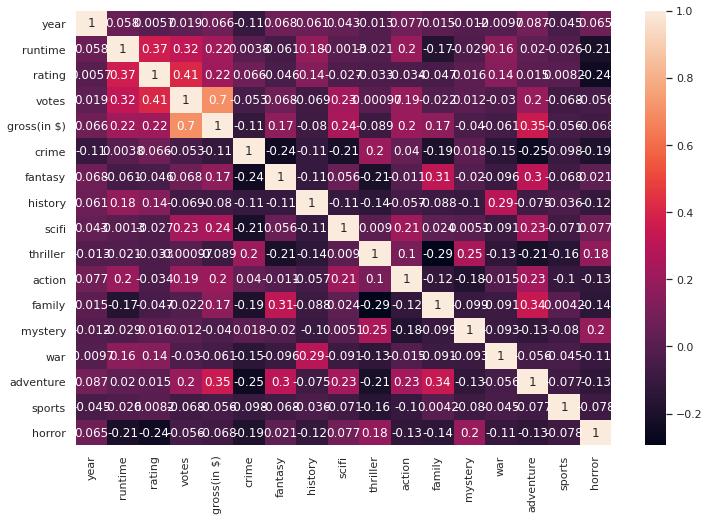

In [17]:
import seaborn as sns
# Correlation Matrix, dropping Film-Noir since none are in our dataframe anymore from the last 25 years
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(df.corr(), annot=True)


<font size="8">Using 'Year' as Numerical</font>


In [19]:
features = list(df.columns)
X_train, X_test, y_train, y_test = train_test_split(df[[f for f in features if f not in ['gross(in $)']]]
                                                    , df['gross(in $)'], test_size=0.2, random_state=42)

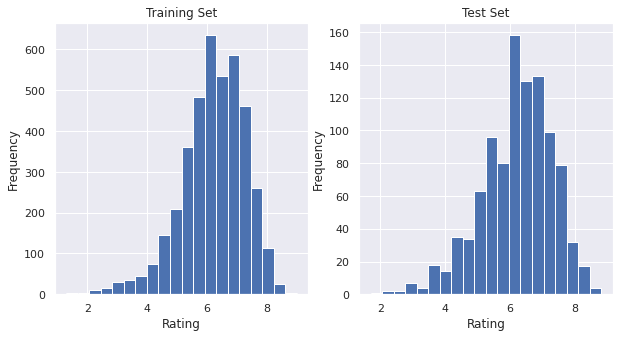

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [21]:
num_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

In [23]:
X_train_num = X_train[[f for f in features if f not in ['gross(in $)', 'certificate']]]
X_train_cat = X_train[['certificate']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [25]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=[f for f in features if f not in ['gross(in $)', 'certificate']]),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate']))
], axis=1)

In [26]:
X_test_num = X_test[[f for f in features if f not in ['gross(in $)', 'certificate']]]
X_test_cat = X_test[['certificate']]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [27]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['gross(in $)', 'certificate']]),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate']))
], axis=1)

<font size="5">Linear Regression</font>

In [28]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['gross(in $)', 'certificate']]), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.5685268975356941
Mean squared error: 2112.363456072683
Mean absolute error: 25.047530682316644


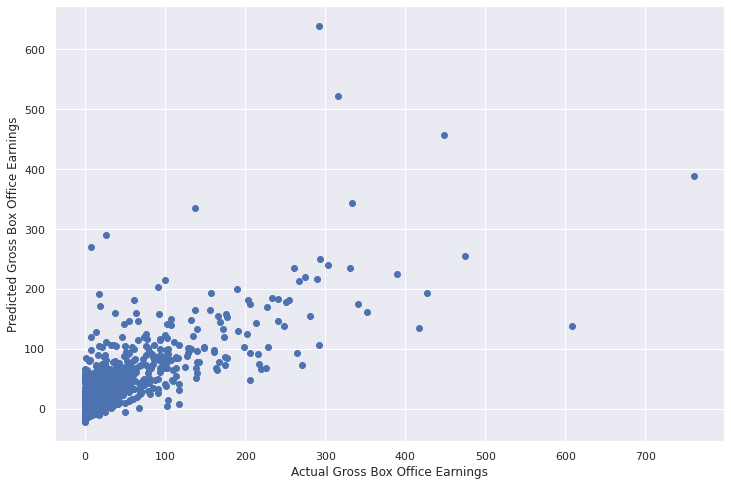

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

In [30]:
model = DecisionTreeRegressor()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.5030219612704823
Mean squared error: 2433.0560618659965
Mean absolute error: 22.970751615079365


<font size="8">Using Year as Categorical (5-year increment)</font>

In [31]:
df['year_category'] = (((df['year'] - 1910) // 5) * 5 + 1910) // 10 * 10
df['year_category'] = df['year_category'].apply(lambda x: str(x) + '-' + str(x+4) if (x+3) < 2023 else str(x) + '-2022')
df

,year,certificate,runtime,rating,votes,gross(in $),crime,fantasy,history,scifi,thriller,action,family,mystery,war,adventure,sports,horror,year_category
0,2019,PG-13,130.0,7.9,705622.0,165.359751,1,0,0,0,1,0,0,1,0,0,0,0,2010-2014
1,2013,R,180.0,8.2,1430476.0,116.900694,1,0,0,0,0,0,0,0,0,0,0,0,2010-2014
2,2008,PG-13,152.0,9.0,2675531.0,534.858444,1,0,0,0,1,1,0,0,0,0,0,0,2000-2004
3,2000,R,102.0,7.6,636221.0,15.070285,1,0,0,0,0,0,0,0,0,0,0,1,2000-2004
4,2014,R,101.0,7.4,644257.0,43.037835,1,0,0,0,1,1,0,0,0,0,0,0,2010-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,2011,NR,90.0,2.4,334.0,0.202531,0,0,0,0,0,0,0,0,0,0,0,1,2010-2014
11271,2010,NR,144.0,4.1,139.0,0.056705,0,0,0,0,0,0,0,0,0,0,0,1,2010-2014
11272,2009,NR,76.0,3.6,248.0,0.025844,0,0,0,0,0,0,0,0,0,0,0,1,2000-2004
11273,2013,NR,89.0,3.7,96.0,0.029000,0,0,0,0,0,0,0,0,0,0,0,1,2010-2014


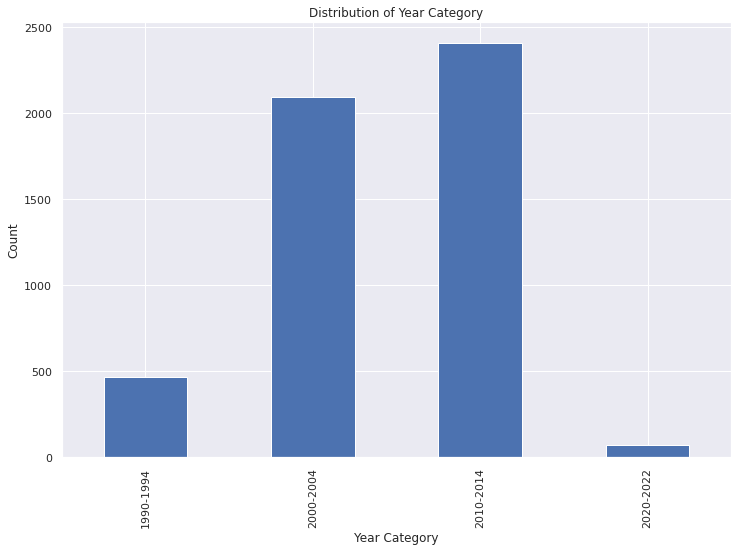

In [32]:
year_counts = df['year_category'].value_counts().sort_index()
year_counts.plot.bar()
plt.title('Distribution of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Count')
plt.show()

In [33]:
features.append('year_category')
X_train, X_test, y_train, y_test = train_test_split(df[[f for f in features if f not in ['year', 'gross(in $)']]]
                                                    , df['gross(in $)'], test_size=0.2, random_state=42)

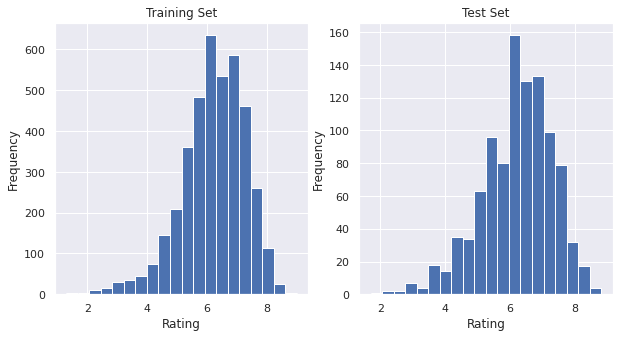

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

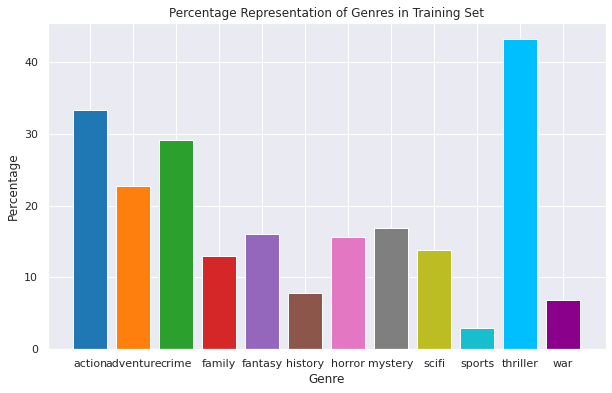

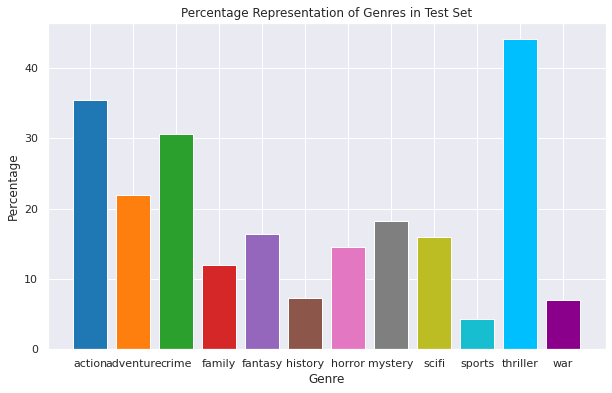

In [39]:
# Distribution of Genres
# Extract the genre columns from the train and test sets
genre_cols = ['action', 'adventure', 'crime', 'family', 'fantasy', 'history', 'horror', 'mystery', 'scifi', 'sports', 'thriller', 'war']
X_train_genre = X_train[genre_cols]
X_test_genre = X_test[genre_cols]

# Define colors for each genre
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#00bfff', '#8b008b', '#ff1493']

# Calculate percentage representation of each genre in the training set
train_genre_counts = X_train_genre.sum(axis=0)
train_genre_percents = train_genre_counts / len(X_train_genre) * 100

# Plot barplot for training set
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(train_genre_percents.index, train_genre_percents, color=colors)
plt.title('Percentage Representation of Genres in Training Set')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.show()

# Calculate percentage representation of each genre in the test set
test_genre_counts = X_test_genre.sum(axis=0)
test_genre_percents = test_genre_counts / len(X_test_genre) * 100

# Plot barplot for test set
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(test_genre_percents.index, test_genre_percents, color=colors)
plt.title('Percentage Representation of Genres in Test Set')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.show()


In [42]:
X_train_num = X_train[[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]]
X_train_cat = X_train[['certificate', 'year_category']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)


In [43]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate','year_category']))
], axis=1)

In [44]:
X_test_num = X_test[[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]]
X_test_cat = X_test[['certificate', 'year_category',]]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [46]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate', 'year_category']))
], axis=1)

<font size="5">Linear Regression</font>

In [48]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.5681412421598091
Mean squared error: 2114.251509622266
Mean absolute error: 24.935142453272793


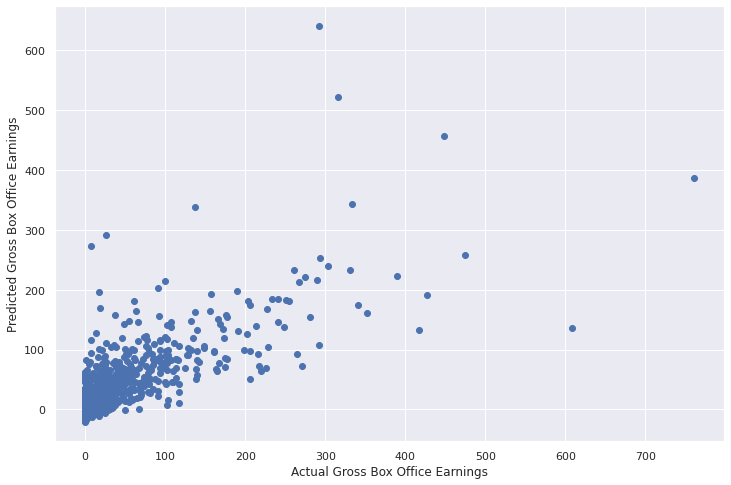

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

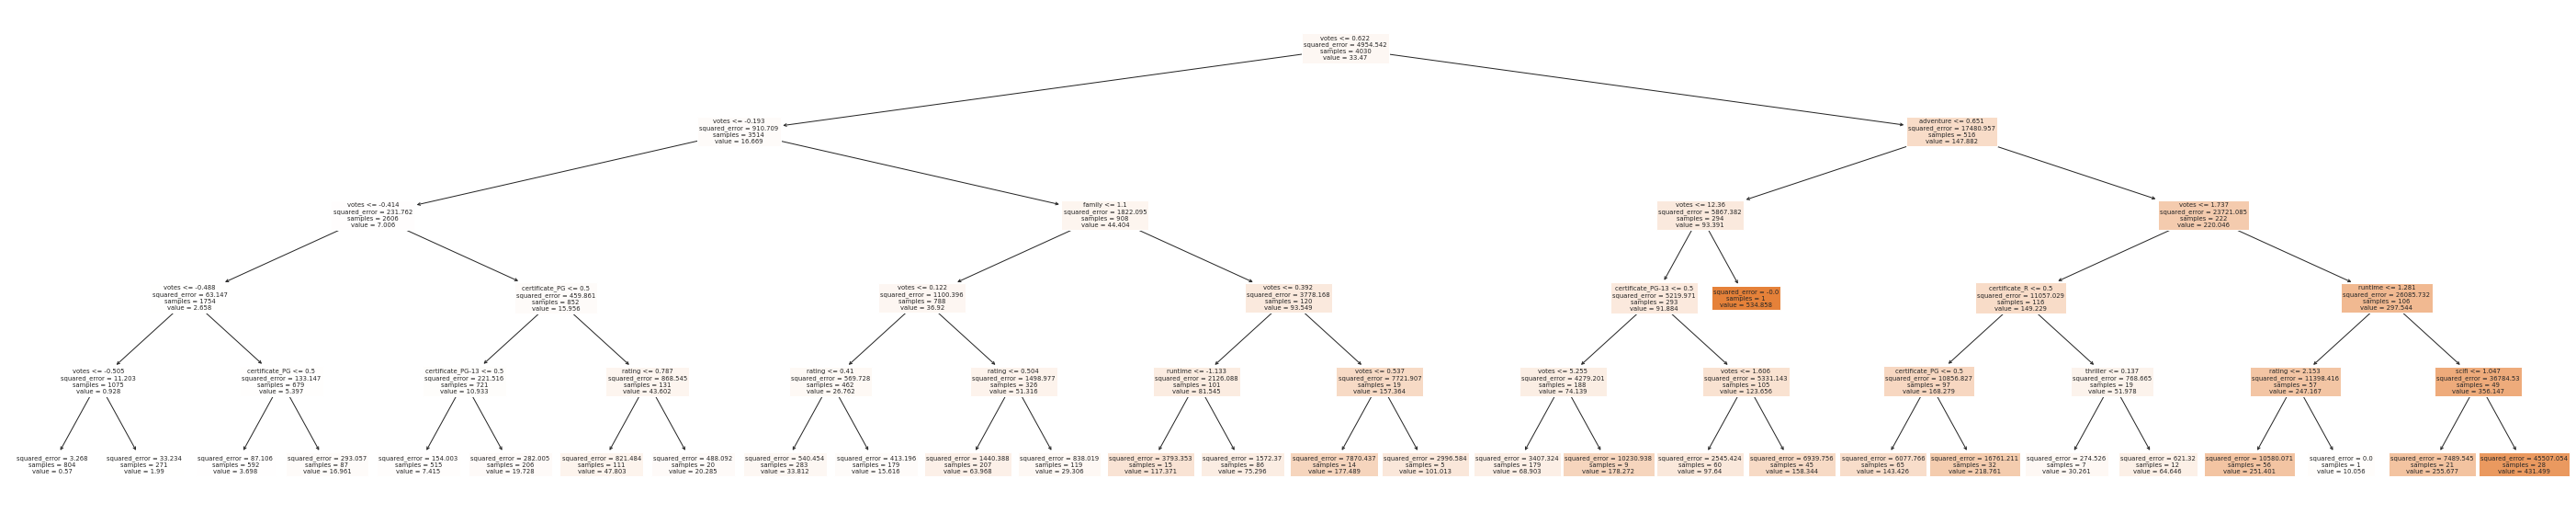

R2 score: 0.6254655764288849
Mean squared error: 1833.6086881761532
Mean absolute error: 20.08481509006242


In [50]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_preprocessed, y_train)
y_pred= model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]),
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate', 'year_category']))], axis=1))

feature_names = X_train_preprocessed.columns
plt.figure(figsize=(50, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="5">SVR</font>

In [51]:
model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7195455494957959
Mean squared error: 1373.0212357490686
Mean absolute error: 16.7303719467723


<font size="5">Random Forest</font>

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_preprocessed, y_train)

y_pred = rf.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=[f for f in features if f not in ['year', 'certificate', 'gross(in $)', 'year_category']]), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names_out(['certificate', 'year_category']))], axis=1))
mse = mean_squared_error(y_test, y_pred)
print(mse)

1332.2541250172999


<font size="5">XGBoost</font>

In [53]:
model = xgb.XGBRegressor()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Root Mean Squared Error:  37.38083274279908


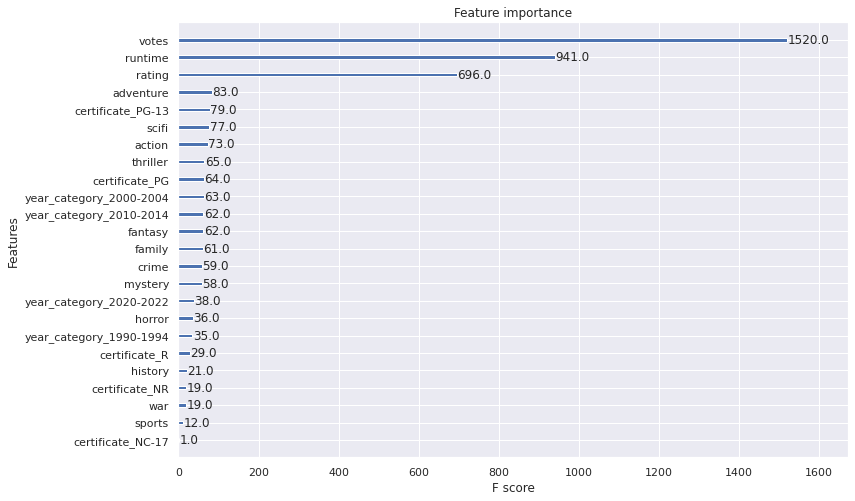

In [54]:
xgb.plot_importance(model)
plt.show()

<font size="5">XGBoost</font>